In [18]:
import os
import cv2
import shutil
import pandas as pd
import glob
from matplotlib import pyplot as plt

## Videos from youtube

### Function for making frames from video

In [40]:
def make_frames_from_video(file_name, output_dir):

    VIDEOS_DIR = os.path.join('.', 'videos')

    video_path = os.path.join(VIDEOS_DIR, file_name)


    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    frame_ind=0
    while ret:
        frame_ind+=1
        cv2.imwrite(f"{output_dir}/{output_dir}_{frame_ind}.jpg", frame)
        ret, frame = cap.read()


    cap.release()
    cv2.destroyAllWindows()

### Make frames from video people.mp4

In [41]:
#make frames from people.mp4 video
make_frames_from_video(file_name="people.mp4", output_dir="people_frames")

### Make frames from video people_from_above.mp4

In [42]:
#make frames from people_from_above.mp4 video
make_frames_from_video(file_name="people_from_above.mp4", output_dir="people_from_above_frames")

### Make frames from video people_walking_on_street.mp4

In [43]:
#make frames from people_from_above.mp4 video
make_frames_from_video(file_name="people_walking_on_street.mp4", output_dir="people_walking_on_street_frames")

## Photos from Open Image Dataset

### Select only necessary images with people from Open Image Dataset (19 images)

In [ ]:
# Download special images from OID using downloader (files to be downloaded are in the image_lists.txt)
!python downloader.py image_lists/image_lists.txt --download_folder=datasets/images --num_processes=5

### Download annotations for OID and read it in the pandas Dataframe

In [7]:
data = pd.read_csv("oidv6-train-annotations-bbox.csv")

In [8]:
data

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,...,0,0,0.148438,0.012500,0.059375,0.195312,0.148438,0.357812,0.587500,0.325000
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,...,0,0,0.025000,0.248438,0.276563,0.214062,0.914062,0.714063,0.782813,0.948438
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,...,0,0,0.243750,0.151562,0.310937,0.262500,0.198437,0.434375,0.507812,0.590625
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,...,0,0,0.315625,0.429688,0.256250,0.423438,0.651563,0.921875,0.826562,0.925000
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,...,0,0,0.317188,0.257812,0.346875,0.307812,0.235938,0.289062,0.348438,0.385938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14610224,fffffdaec951185d,xclick,/m/0dzct,1,0.445625,0.672500,0.154784,0.200750,1,0,...,0,0,0.510000,0.445625,0.538125,0.672500,0.154784,0.168856,0.200750,0.176360
14610225,fffffdaec951185d,xclick,/m/0dzct,1,0.695625,0.786250,0.118199,0.297373,0,0,...,0,0,0.725000,0.748125,0.695625,0.786250,0.118199,0.297373,0.233583,0.207317
14610226,fffffdaec951185d,xclick,/m/0dzct,1,0.788750,0.835000,0.198874,0.272045,1,0,...,0,0,0.814375,0.814375,0.788750,0.835000,0.198874,0.272045,0.245779,0.247655
14610227,fffffdaec951185d,xclick,/m/0dzct,1,0.796875,0.951875,0.156660,0.205441,1,0,...,0,0,0.868750,0.796875,0.951875,0.942500,0.156660,0.176360,0.189493,0.205441


In [9]:
#Convert annotations to YOLO format: c_x, c_y, width, height
data['center_x']=(data['XMin']+data['XMax'])/2
data['center_y']=(data['YMin']+data['YMax'])/2
data['width'] = data['XMax']-data['XMin']
data['height'] = data['YMax']-data['YMin']

In [10]:
data

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y,center_x,center_y,width,height
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,...,0.059375,0.195312,0.148438,0.357812,0.587500,0.325000,0.103906,0.367969,0.182812,0.439062
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,...,0.276563,0.214062,0.914062,0.714063,0.782813,0.948438,0.150782,0.831251,0.251563,0.234375
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,...,0.310937,0.262500,0.198437,0.434375,0.507812,0.590625,0.231249,0.394531,0.159375,0.392188
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,...,0.256250,0.423438,0.651563,0.921875,0.826562,0.925000,0.342969,0.788282,0.173438,0.273437
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,...,0.346875,0.307812,0.235938,0.289062,0.348438,0.385938,0.302343,0.310938,0.089063,0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14610224,fffffdaec951185d,xclick,/m/0dzct,1,0.445625,0.672500,0.154784,0.200750,1,0,...,0.538125,0.672500,0.154784,0.168856,0.200750,0.176360,0.559063,0.177767,0.226875,0.045966
14610225,fffffdaec951185d,xclick,/m/0dzct,1,0.695625,0.786250,0.118199,0.297373,0,0,...,0.695625,0.786250,0.118199,0.297373,0.233583,0.207317,0.740938,0.207786,0.090625,0.179174
14610226,fffffdaec951185d,xclick,/m/0dzct,1,0.788750,0.835000,0.198874,0.272045,1,0,...,0.788750,0.835000,0.198874,0.272045,0.245779,0.247655,0.811875,0.235459,0.046250,0.073171
14610227,fffffdaec951185d,xclick,/m/0dzct,1,0.796875,0.951875,0.156660,0.205441,1,0,...,0.951875,0.942500,0.156660,0.176360,0.189493,0.205441,0.874375,0.181051,0.155000,0.048781


### Make annotations for files in image_lists

In [18]:
files = os.listdir("dataset/images/")

for file_name in files:
    file_id = file_name.split(".")[0]
    rows = data[data['ImageID']==file_id]
    with open(f"dataset/labels/{file_id}.txt", "w") as f:
        for i, row in rows.iterrows():
            f.write("0"+ " "+str(row['center_x'])+" "+str(row['center_y'])+" "+str(row['width'])+" "+str(row['height'])+"\n")


### Add my own annotations for people.mp4 frames and from people_from_above.mp4 frames

### Add annotations and images from People.mp4 frames (annotations vere made by CVAT)

In [45]:
def add_annotations(annotation_folder, image_folder, destination_folder):
    files = os.listdir(annotation_folder)

    for file_name in files:
        with open(f"{annotation_folder}/{file_name}", "r") as f:
            lines = f.readlines()
            if len(lines)>0: #if there is annotation for this file - copy it and annotations to the datasets dir
                shutil.copy(f"{annotation_folder}/{file_name}", f"{destination_folder}/labels/{file_name}")
                name = file_name.split(".")[0]
                shutil.copy(f"{image_folder}/{name}.jpg", f"{destination_folder}/images/{name}.jpg")

In [48]:
# files = os.listdir("people_from_above/obj_train_data")
# i=0
# for file_name in files:
#     i+=1
#     os.rename(f"people_from_above/obj_train_data/{file_name}", f"people_from_above/obj_train_data/people_from_above_frames_{i}")

In [49]:
#add annotations from people folder (65 images)
add_annotations("people/obj_train_data", "people_frames", "datasets")

In [50]:
#add annotations from people_from_above folder
add_annotations("people_from_above/obj_train_data", "people_from_above_frames", "datasets")

In [51]:
#add annotations from people_walking_on_street folder
add_annotations("people_walking_on_street/obj_train_data", "people_walking_on_street_frames", "datasets")

### Show results after training YOLOv8

In [16]:
results = pd.read_csv("ultralytics/runs/detect/train2/results.csv")

In [28]:
results.columns = [column.strip() for column in results.columns]

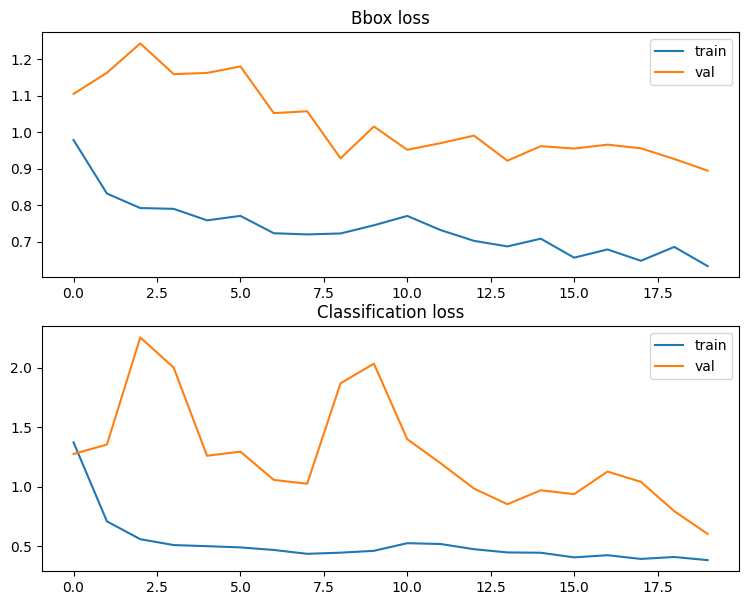

In [35]:
plt.figure(figsize=(9,7))
plt.subplot(2,1,1)
plt.plot(results.index, results['train/box_loss'], label="train")
plt.plot(results.index, results['val/box_loss'], label="val")
plt.title("Bbox loss")
plt.legend(loc="upper right")
plt.subplot(2,1,2)
plt.plot(results['epoch'], results['train/cls_loss'], label="train")
plt.plot(results['epoch'], results['val/cls_loss'], label="val")
plt.title("Classification loss")
plt.legend(loc="upper right")
plt.tight_layout
plt.show()